### Name : Shobhit Mirjankar
### Batch : C32
### Roll No : 1902101

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
threshold = 0.5

In [2]:
# Reading dataset

dataset = pd.read_csv('bank.csv')
dataset

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
# Checking min and max values of each column

dataset.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [4]:
X = dataset[['variance','skewness','curtosis','entropy']]
y = dataset['class']
X.insert(0, 'x0', 1)
X

,x0,variance,skewness,curtosis,entropy
0,1,3.62160,8.66610,-2.8073,-0.44699
1,1,4.54590,8.16740,-2.4586,-1.46210
2,1,3.86600,-2.63830,1.9242,0.10645
3,1,3.45660,9.52280,-4.0112,-3.59440
4,1,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...,...
1367,1,0.40614,1.34920,-1.4501,-0.55949
1368,1,-1.38870,-4.87730,6.4774,0.34179
1369,1,-3.75030,-13.45860,17.5932,-2.77710
1370,1,-3.56370,-8.38270,12.3930,-1.28230


In [5]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

In [6]:
# Splitting dataset into training and testing set : 75% for training

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, 
                                                    random_state = 13)
X_train

,x0,variance,skewness,curtosis,entropy
320,1,0.51950,-3.2633,3.08950,-0.98490
976,1,-2.29870,-5.2270,5.63000,0.91722
685,1,4.07150,7.6398,-2.08240,-1.16980
230,1,-1.33890,1.5520,7.08060,1.03100
691,1,0.57060,-0.0248,1.24210,-0.56210
...,...,...,...,...,...
866,1,-4.14090,3.4619,-0.47841,-3.88790
742,1,0.66191,9.6594,-0.28819,-1.66380
74,1,4.40690,10.9072,-4.57750,-4.42710
176,1,0.19081,9.1297,-3.72500,-5.82240


In [7]:
# Functions required for Logistic Regression

def sigmoid(z):
    return 1/(1+np.exp(-z))

def predict(X, theta):
    return sigmoid(np.matmul(X,theta))
    
def calculate_cost(y_actual,y_pred):
    return (-1/len(y_actual))*(np.sum(((y_actual)*np.log10(y_pred)) + 
                                      ((1-y_actual)*np.log10(1-y_pred))))

def calculate_gradient(X,y_actual,y_pred):
    return np.array(np.sum(np.multiply(y_pred-y_actual,X),axis=0)).reshape(len(X[0]),1)

def fit(X,y,learning_rate=0.0001,epochs=30):
    X = X.values
    y = y.values.reshape(len(y),1)
    theta = np.array([0.3,0.2,0.4,0.5,0.6]).reshape(len(X[0]),1)
    cost = []
    for epoch in range(1,epochs+1):
        y_pred = predict(X,theta)
        y_actual = y
        J = calculate_cost(y_actual,y_pred)
        cost.append(J)
        print('Epoch: ',epoch,', Cost Function Value (J) = ',"{:.3f}".format(J),
              ', Theta values : ',theta.T)
        grads = calculate_gradient(X,y_actual,y_pred)
        theta = theta - (learning_rate*grads)
    return theta,cost

In [8]:
# Training the Logistic Regression model to learn parameter vector theta

theta, cost = fit(X_train,y_train)

Epoch:  1 , Cost Function Value (J) =  0.755 , Theta values :  [[0.3 0.2 0.4 0.5 0.6]]
Epoch:  2 , Cost Function Value (J) =  0.558 , Theta values :  [[0.27615442 0.04823653 0.22119171 0.45947838 0.59223527]]
Epoch:  3 , Cost Function Value (J) =  0.446 , Theta values :  [[ 0.25894469 -0.07306558  0.14810471  0.37486473  0.56057643]]
Epoch:  4 , Cost Function Value (J) =  0.362 , Theta values :  [[ 0.2466168  -0.17546681  0.10585627  0.28848248  0.52404742]]
Epoch:  5 , Cost Function Value (J) =  0.299 , Theta values :  [[ 0.23816852 -0.26168589  0.07395583  0.20942598  0.48805732]]
Epoch:  6 , Cost Function Value (J) =  0.253 , Theta values :  [[ 0.23311351 -0.33368733  0.0452629   0.14097928  0.45435263]]
Epoch:  7 , Cost Function Value (J) =  0.219 , Theta values :  [[ 0.23096491 -0.39387812  0.01802941  0.08331069  0.42322239]]
Epoch:  8 , Cost Function Value (J) =  0.194 , Theta values :  [[ 0.23116737 -0.44470797 -0.00767918  0.03498833  0.39445697]]
Epoch:  9 , Cost Function Val

In [9]:
print('Learned parameter vector Theta : ')
print(theta)

Learned parameter vector Theta : 
[[ 0.37219698]
 [-0.87913272]
 [-0.30882403]
 [-0.34983492]
 [ 0.05025714]]


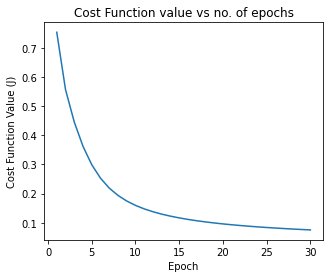

In [10]:
# Plotting Cost function value vs no. of epochs

plt.figure(figsize=(5, 4))
ax = plt.axes()
plt.plot(range(1,31),cost)
plt.title('Cost Function value vs no. of epochs')
ax.set_xlabel('Epoch')
ax.set_ylabel('Cost Function Value (J)')
plt.show()

In [11]:
# Evaluating model performance on Training set

y_train_pred = [0 if value < threshold else 1 
                for value in predict(X_train.values,theta).flatten()]
print('Training set performance : \n')
print(classification_report(y_train,y_train_pred))

Training set performance : 

              precision    recall  f1-score   support

           0       0.94      1.00      0.96       567
           1       1.00      0.92      0.95       462

    accuracy                           0.96      1029
   macro avg       0.97      0.96      0.96      1029
weighted avg       0.96      0.96      0.96      1029



In [12]:
# Evaluating model performance on Test set

y_test_pred = [0 if value < threshold else 1 
               for value in predict(X_test.values,theta).flatten()]
print('Test set performance : \n')
print(classification_report(y_test,y_test_pred))

Test set performance : 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       195
           1       0.99      0.95      0.97       148

    accuracy                           0.97       343
   macro avg       0.97      0.97      0.97       343
weighted avg       0.97      0.97      0.97       343



In [13]:
# Confusion Matrix for Test set

print('Confusion Matrix :\n')
print(confusion_matrix(y_test,y_test_pred))

Confusion Matrix :

[[193   2]
 [  8 140]]


In [14]:
result = pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
result

,Actual,Predicted
308,0,0
1330,1,1
472,0,0
304,0,0
33,0,0
...,...,...
435,0,0
181,0,0
165,0,0
80,0,0


In [15]:
# Classifying note using user input

X_ip = [1] + list(map(float,input("Enter variance, skewness, curtosis,",
                                  " entropy of bank note image wavelet transform : ")
                      .split()))[:4]
X_ip = np.array(X_ip).reshape(1,len(X_ip))
prediction = [0 if value < threshold else 1 for value in predict(X_ip,theta).flatten()]
print('Predicted class label : ',prediction[0])

Enter variance, skewness, curtosis, entropy of bank note image wavelet transform : -3.2 -7.4 3.4 2.2
Predicted class label :  1


Hence the Logistic Regression model has achieved a 96% accuracy on training set and a 97% accuracy on test set